In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
dataa = data.dropna()
dataa

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


## Visualisasi 1 - Banyaknya Konten Netflix Berdasarkan Rating

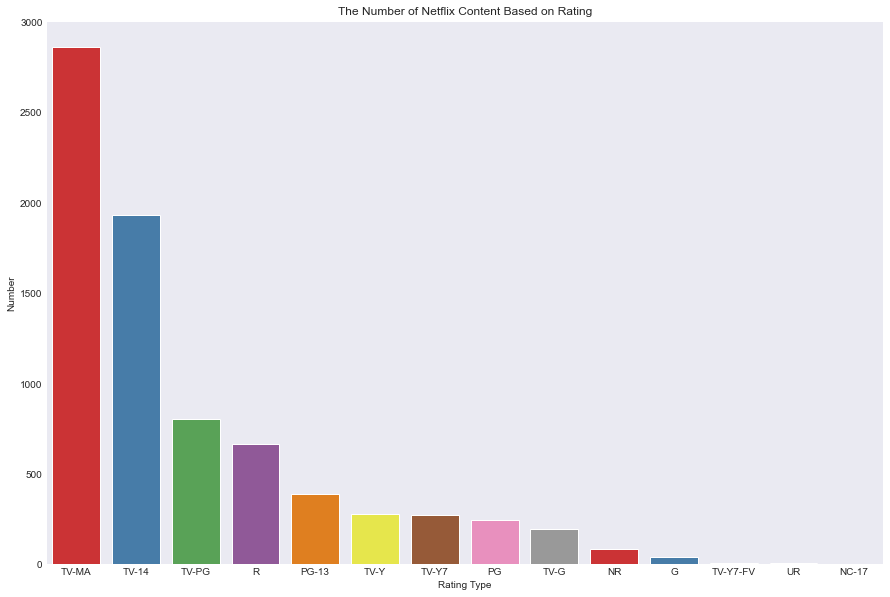

In [7]:
plt.figure(figsize=(15,10))
sns.set_style("dark")
sns.countplot(x="rating", data=data, palette="Set1", order=data["rating"].value_counts().index[0:15])
plt.title("The Number of Netflix Content Based on Rating")
plt.xlabel ("Rating Type")
plt.ylabel ("Number")
plt.show()

## Visualisasi 2 - Persentase Tipe Konten Netflix

<AxesSubplot:title={'center':'Percentage of Netflix Contents Type'}, ylabel='type'>

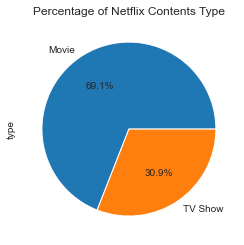

In [8]:
Type = data["type"].value_counts().sort_values(ascending=False)[0:50]
plt.title("Percentage of Netflix Contents Type")
Type.plot.pie(autopct="%.1f%%")

## Visualisasi 3 - Banyaknya Konten Netflix Berdasarkan Negara Asalnya

In [9]:
country = data["country"].value_counts().sort_values(ascending=False)[0:50]
countrydata = pd.DataFrame(country)
countrydata

,country
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101
Turkey,100


Text(0.5, 1.0, 'Netflix Creator Country')

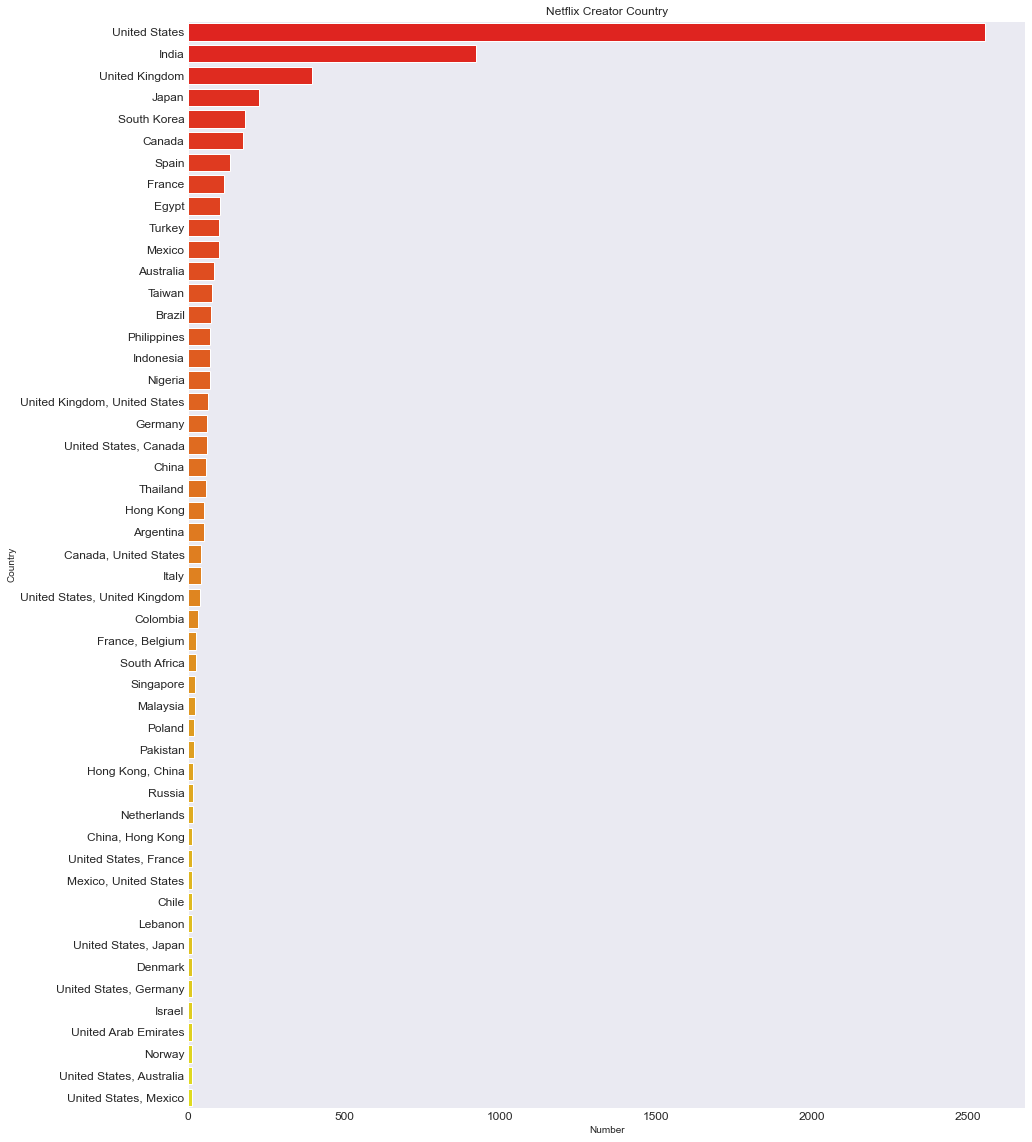

In [10]:
plt.figure(1, figsize=(15,20))
sns.countplot(y="country", data=data, palette="autumn", order=data["country"].value_counts().index[0:50])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel ("Number")
plt.ylabel ("Country")
plt.title("Netflix Creator Country")

## Visualisasi 4 - Banyaknya Konten Netflix Berdasarkan Tahun Rilis

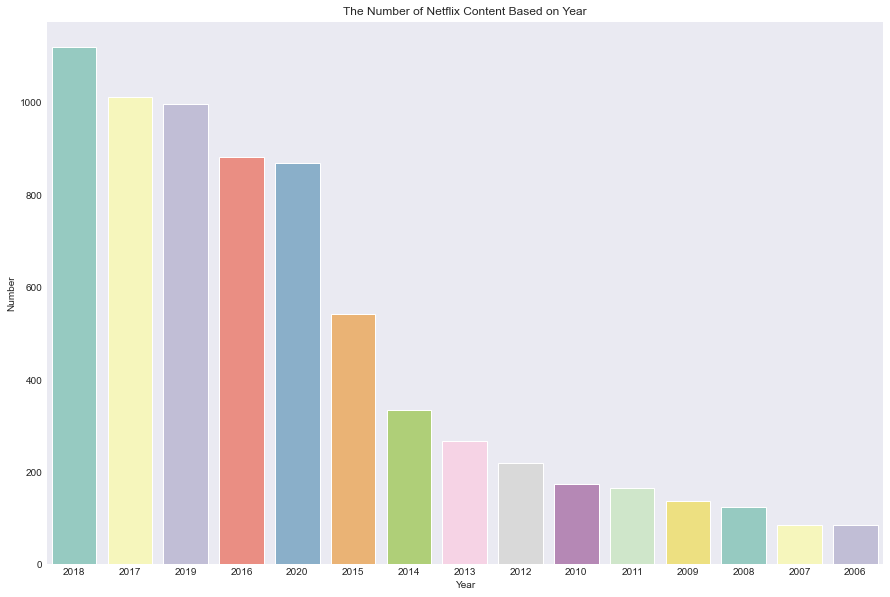

In [11]:
plt.figure(figsize=(15,10))
sns.set_style("dark")
sns.countplot(x="release_year", data=data, palette="Set3", order=data["release_year"].value_counts().index[0:15])
plt.title("The Number of Netflix Content Based on Year")
plt.xlabel ("Year")
plt.ylabel ("Number")
plt.show()

## Visualisasi 5 - Top 10 Director on Netflix

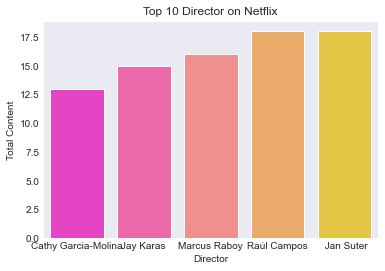

In [21]:
data['director']=data['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=data['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop10=directors.head(10)
directorsTop10=directorsTop10.sort_values(by=['Total Content'])
directorsTop10

plt.title("Top 10 Director on Netflix")
sns.barplot(x = 'Director', y = 'Total Content', data = directorsTop5, palette = "spring");

## Visualisasi 6 - Top 5 Actor on Netflix

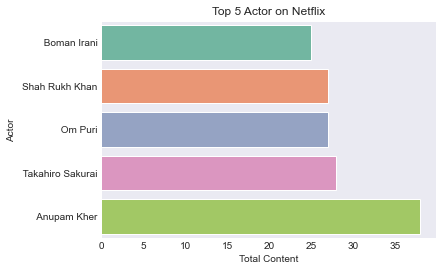

In [13]:
data['cast']=data['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=data['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])

plt.title("Top 5 Actor on Netflix")
sns.barplot(x = 'Total Content', y = 'Actor', data = actorsTop5, palette = "Set2");

## Visualisasi 7 - Persentase Konten Netflix Berdasarkan Rating (Pie Plot)

<AxesSubplot:title={'center':'Percentage of Netflix Contents Based on Ratings'}, ylabel='rating'>

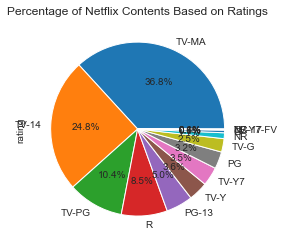

In [14]:
Rating = data["rating"].value_counts().sort_values(ascending=False)[0:50]
plt.title("Percentage of Netflix Contents Based on Ratings")
Rating.plot.pie(autopct="%.1f%%")

## Visualisasi 8 - Top 20 Genres on Netflix

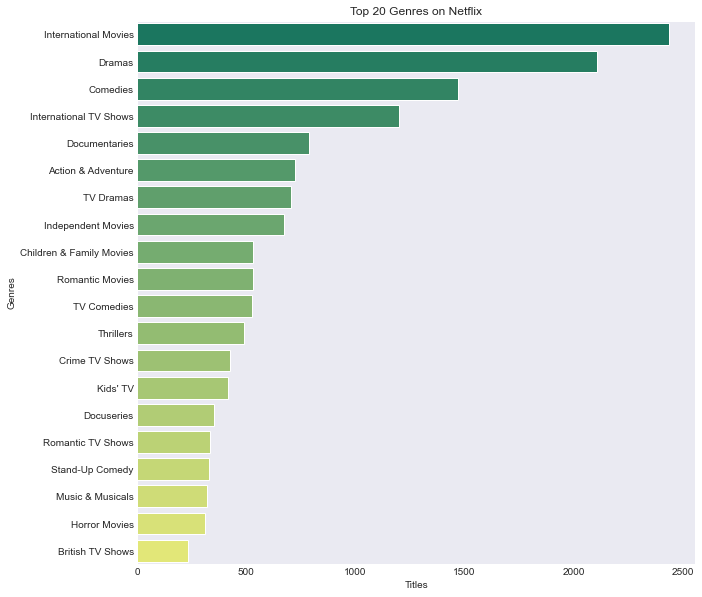

In [15]:
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20], palette="summer")
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

## Visualisasi 9 - Top 5 Actors on Netflix (Area Chart)

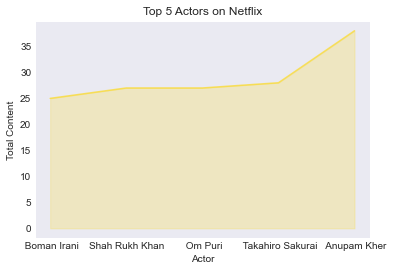

In [28]:
x = actorsTop5['Actor']
y = actorsTop5["Total Content"]


#Area Chart
#Change the color and its transparency
plt.title("Top 5 Actors on Netflix")
plt.fill_between(x, y, color = 'gold', alpha = 0.2)
plt.xlabel('Actor')
plt.ylabel('Total Content')
plt.plot(x, y, color = 'gold', alpha = 0.6)

## Visualisasi 10 - Top 10 Directors on Netflix (Area Chart)

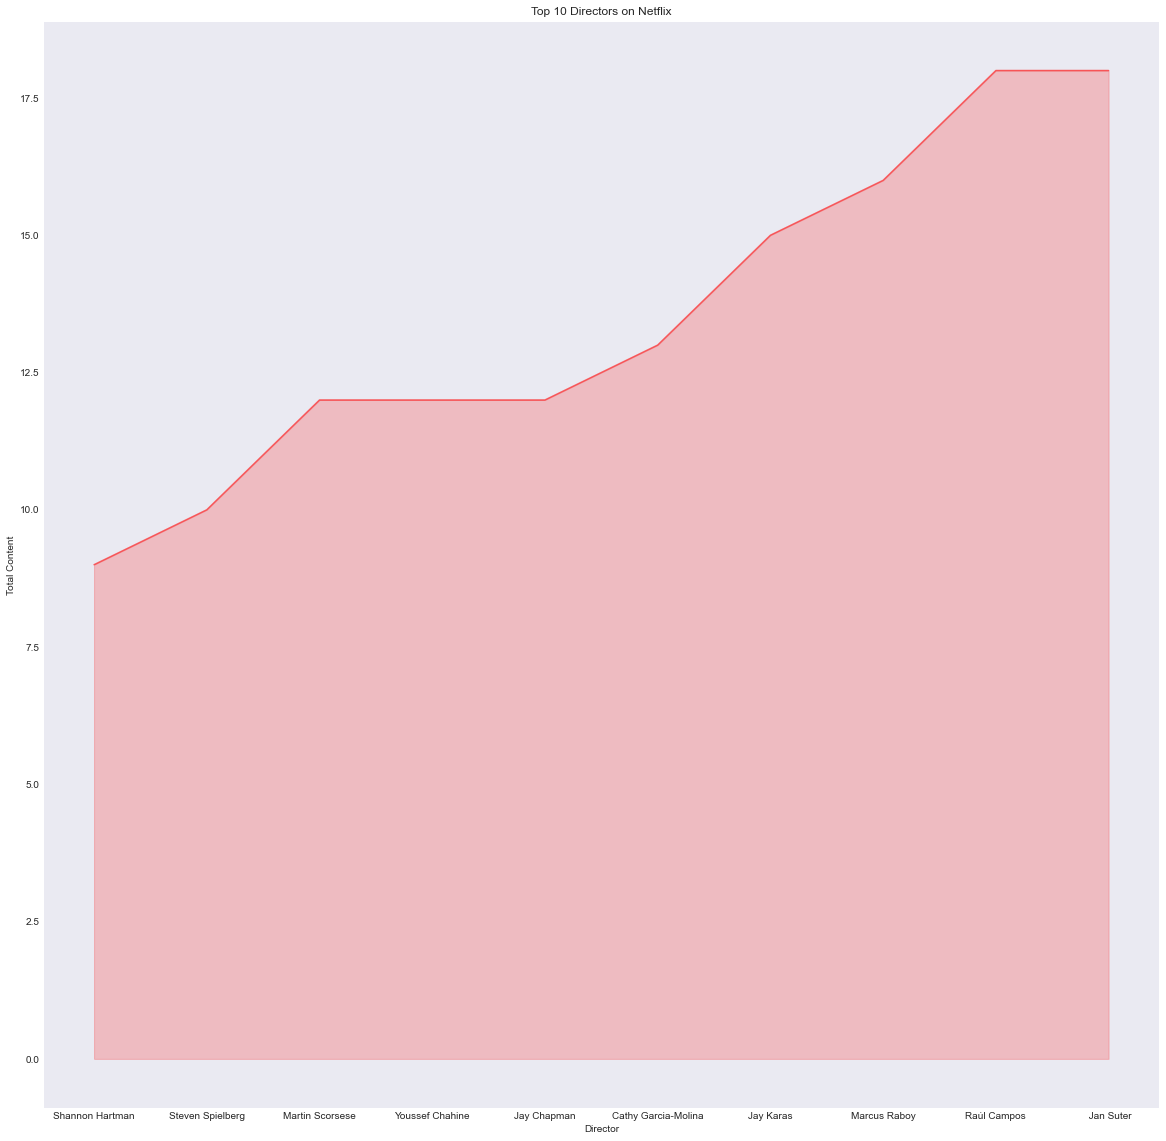

In [26]:
fig, ax = plt.subplots(figsize = (20,20))

x = directorsTop10['Director']
y = directorsTop10["Total Content"]


#Area Chart
#Change the color and its transparency
plt.fill_between(x, y, color = 'red', alpha = 0.2)
plt.title("Top 10 Directors on Netflix")
plt.xlabel('Director')
plt.ylabel('Total Content')
plt.plot(x, y, color = 'red', alpha = 0.6)